# Project Metadata

**Project Name**: Small object dection using YOLOv8 with SAHI  
**Author**: Miley Nguyen  
**Team**: RedBack - Crowd Mornitoring  
**Date**: August 5, 2024


# Description

This project focuses on object detection, specifically detecting small objetcs which usually get passed by some current model like YOLO.

## Challenges in Detecting Small Objects

### Small Size
Small objects are difficult to detect because they provide limited information for the model. For example, a car in the distance may only cover a few pixels, making it hard for the model to recognize without distinctive features like wheels and license plates, similar to how humans struggle to identify distant objects.

### Training Data Limitations
The performance of models is heavily dependent on the quality of training data. Most standard object detection datasets focus on medium to large-sized objects, meaning that many pre-trained models are not optimized for detecting small objects.

### Fixed Input Sizes
Typically, object detection models use fixed-size inputs. For example, YOLOv8 processes images with a maximum side length of 640 pixels. Consequently, if we input an image of size 1920×1080, it is downsampled to 640×360, which can reduce resolution and cause the loss of crucial details needed for small object detection.

## How SAHI Works

SAHI (Slicing Aided Hyper Inference) enhances object detection by dividing images into smaller sections, performing detection on each section, and then combining the results.

### What is Sliced Inference?

Sliced Inference involves breaking down a large or high-resolution image into smaller sections (slices), conducting object detection on each, and then reassembling the results to identify object locations in the original image. This method is particularly useful when computational resources are limited or when dealing with high-resolution images that could cause memory issues.

### Benefits of Sliced Inference

- **Reduced Computational Load**: Processing smaller image slices is quicker and requires less memory, allowing for smoother operation on less powerful hardware.

- **Maintained Detection Quality**: Since each slice is analyzed independently, the detection quality remains high, as long as the slices are sufficiently large to capture relevant objects.

- **Improved Scalability**: This technique facilitates easier scaling across varying image sizes and resolutions, making it suitable for a wide range of applications, from satellite imagery to medical diagnostics.


In [ ]:
#Install library
!pip install -q torch sahi yolov8 ultralytics opencv-python roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.5/865.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 77.2 MB/s eta 0:00:00
 

In [ ]:
#Import needed lib
#YOLOv8-S model
from sahi.utils.yolov8 import(
    download_yolov8s_model
)

#Import required functions and classes
from sahi import AutoDetectionModel #create model
from sahi.predict import predict #Prediction
from roboflow import Roboflow
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
#Download weight YOLOv8, use pretrain model s (light and fast)
yolov8_model_path = 'models/yolov8s.pt'
download_yolov8s_model(yolov8_model_path)

In [ ]:
#Load model
detection_model = AutoDetectionModel.from_pretrained(
    model_type = "yolov8",
    model_path = yolov8_model_path,
    confidence_threshold = 0.2,
    device = "cuda:0"
)

In [ ]:
#Dataset
rf = Roboflow(api_key="BRi5EtifJ3XF43kABGLD")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(10)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.73, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to football-players-detection-10 in yolov8:: 100%|██████████| 636/636 [00:00<00:00, 1270.72it/s]


**Batch prediction without SAHI**

Perform standard inference

In [ ]:
results_base = predict(
    detection_model,
    source="/content/football-players-detection-10/test/images",
)

There are 19 listed files in folder: images/


Performing inference on images:   0%|          | 0/19 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:   5%|▌         | 1/19 [00:14<04:16, 14.26s/it]

Prediction time is: 14052.97 ms
Performing prediction on 15 slices.


Performing inference on images:  11%|█         | 2/19 [00:26<03:39, 12.89s/it]

Prediction time is: 11796.60 ms
Performing prediction on 15 slices.


Performing inference on images:  16%|█▌        | 3/19 [00:38<03:19, 12.49s/it]

Prediction time is: 11880.30 ms
Performing prediction on 15 slices.


Performing inference on images:  21%|██        | 4/19 [00:50<03:03, 12.22s/it]

Prediction time is: 11589.14 ms


Performing inference on images:  21%|██        | 4/19 [00:50<03:03, 12.22s/it]

Performing prediction on 15 slices.


Prediction time is: 11079.00 ms


Performing inference on images:  26%|██▋       | 5/19 [01:01<02:46, 11.88s/it]

Performing prediction on 15 slices.


Performing inference on images:  32%|███▏      | 6/19 [01:12<02:33, 11.77s/it]

Prediction time is: 11427.18 ms
Performing prediction on 15 slices.


Performing inference on images:  37%|███▋      | 7/19 [01:26<02:28, 12.38s/it]

Prediction time is: 13477.03 ms
Performing prediction on 15 slices.


Performing inference on images:  42%|████▏     | 8/19 [01:38<02:14, 12.27s/it]

Prediction time is: 11889.21 ms
Performing prediction on 15 slices.


Performing inference on images:  47%|████▋     | 9/19 [01:50<02:01, 12.16s/it]

Prediction time is: 11771.25 ms
Performing prediction on 15 slices.


Performing inference on images:  53%|█████▎    | 10/19 [02:00<01:44, 11.64s/it]

Prediction time is: 10269.81 ms


Performing inference on images:  53%|█████▎    | 10/19 [02:00<01:44, 11.64s/it]

Performing prediction on 15 slices.


Performing inference on images:  58%|█████▊    | 11/19 [02:12<01:33, 11.64s/it]

Prediction time is: 11483.48 ms
Performing prediction on 15 slices.


Performing inference on images:  63%|██████▎   | 12/19 [02:24<01:21, 11.71s/it]

Prediction time is: 11736.49 ms
Performing prediction on 15 slices.


Performing inference on images:  68%|██████▊   | 13/19 [02:36<01:10, 11.79s/it]

Prediction time is: 11820.52 ms
Performing prediction on 15 slices.


Performing inference on images:  74%|███████▎  | 14/19 [02:48<00:59, 11.82s/it]

Prediction time is: 11733.45 ms
Performing prediction on 15 slices.


Performing inference on images:  79%|███████▉  | 15/19 [02:58<00:45, 11.39s/it]

Prediction time is: 10206.48 ms
Performing prediction on 15 slices.


Performing inference on images:  84%|████████▍ | 16/19 [03:10<00:34, 11.48s/it]

Prediction time is: 11555.79 ms
Performing prediction on 15 slices.


Performing inference on images:  89%|████████▉ | 17/19 [03:22<00:23, 11.74s/it]

Prediction time is: 12175.89 ms
Performing prediction on 15 slices.


Performing inference on images:  95%|█████████▍| 18/19 [03:34<00:11, 11.77s/it]

Prediction time is: 11704.08 ms
Performing prediction on 15 slices.


Performing inference on images: 100%|██████████| 19/19 [03:46<00:00, 11.92s/it]

Prediction time is: 11782.14 ms
Prediction results are successfully exported to runs/predict/exp


**Batch prediction with SAHI**

Perform sliced inference by specifying the slice dimensions and overlap ratios

In [ ]:
results = predict(
    detection_model,
    source="/content/football-players-detection-10/test/images",
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

There are 19 listed files in folder: images/


Performing inference on images:   0%|          | 0/19 [00:00<?, ?it/s]

Performing prediction on 60 slices.


Performing inference on images:   5%|▌         | 1/19 [00:43<13:03, 43.52s/it]

Prediction time is: 43324.13 ms


Performing inference on images:   5%|▌         | 1/19 [00:43<13:03, 43.52s/it]

Performing prediction on 60 slices.


Performing inference on images:  11%|█         | 2/19 [01:26<12:13, 43.15s/it]

Prediction time is: 42674.41 ms


Performing inference on images:  11%|█         | 2/19 [01:26<12:13, 43.15s/it]

Performing prediction on 60 slices.


Performing inference on images:  16%|█▌        | 3/19 [02:29<13:58, 52.42s/it]

Prediction time is: 63294.15 ms
Performing prediction on 60 slices.


Performing inference on images:  21%|██        | 4/19 [03:13<12:11, 48.78s/it]

Prediction time is: 43062.51 ms
Performing prediction on 60 slices.


Performing inference on images:  26%|██▋       | 5/19 [04:05<11:39, 49.95s/it]

Prediction time is: 51794.64 ms


Performing inference on images:  26%|██▋       | 5/19 [04:05<11:39, 49.95s/it]

Performing prediction on 60 slices.


Performing inference on images:  32%|███▏      | 6/19 [04:48<10:21, 47.81s/it]

Prediction time is: 43478.51 ms
Performing prediction on 60 slices.


Performing inference on images:  37%|███▋      | 7/19 [05:33<09:22, 46.84s/it]

Prediction time is: 44618.63 ms


Performing inference on images:  37%|███▋      | 7/19 [05:33<09:22, 46.84s/it]

Performing prediction on 60 slices.


Performing inference on images:  42%|████▏     | 8/19 [06:21<08:38, 47.10s/it]

Prediction time is: 47426.37 ms


Performing inference on images:  42%|████▏     | 8/19 [06:21<08:38, 47.10s/it]

Performing prediction on 60 slices.


Performing inference on images:  47%|████▋     | 9/19 [07:04<07:39, 45.91s/it]

Prediction time is: 43093.68 ms


Performing inference on images:  47%|████▋     | 9/19 [07:04<07:39, 45.91s/it]

Performing prediction on 60 slices.


Performing inference on images:  53%|█████▎    | 10/19 [07:47<06:45, 45.08s/it]

Prediction time is: 43003.78 ms


Performing inference on images:  53%|█████▎    | 10/19 [07:47<06:45, 45.08s/it]

Performing prediction on 60 slices.


Performing inference on images:  58%|█████▊    | 11/19 [08:31<05:57, 44.66s/it]

Prediction time is: 43464.72 ms


Performing inference on images:  58%|█████▊    | 11/19 [08:31<05:57, 44.66s/it]

Performing prediction on 60 slices.


Performing inference on images:  63%|██████▎   | 12/19 [09:15<05:10, 44.39s/it]

Prediction time is: 43553.11 ms


Performing inference on images:  63%|██████▎   | 12/19 [09:15<05:10, 44.39s/it]

Performing prediction on 60 slices.


Performing inference on images:  68%|██████▊   | 13/19 [09:58<04:24, 44.08s/it]

Prediction time is: 43145.54 ms


Performing inference on images:  68%|██████▊   | 13/19 [09:58<04:24, 44.08s/it]

Performing prediction on 60 slices.


Performing inference on images:  68%|██████▊   | 13/19 [10:41<04:24, 44.08s/it]

Prediction time is: 43335.56 ms


Performing inference on images:  74%|███████▎  | 14/19 [10:42<03:39, 43.93s/it]

Performing prediction on 60 slices.


Performing inference on images:  79%|███████▉  | 15/19 [11:26<02:56, 44.01s/it]

Prediction time is: 43980.48 ms


Performing inference on images:  79%|███████▉  | 15/19 [11:26<02:56, 44.01s/it]

Performing prediction on 60 slices.


Performing inference on images:  84%|████████▍ | 16/19 [12:10<02:11, 43.98s/it]

Prediction time is: 43725.19 ms


Performing inference on images:  84%|████████▍ | 16/19 [12:10<02:11, 43.98s/it]

Performing prediction on 60 slices.


Performing inference on images:  89%|████████▉ | 17/19 [12:54<01:27, 43.94s/it]

Prediction time is: 43623.70 ms


Performing inference on images:  89%|████████▉ | 17/19 [12:54<01:27, 43.94s/it]

Performing prediction on 60 slices.


Performing inference on images:  95%|█████████▍| 18/19 [13:37<00:43, 43.80s/it]

Prediction time is: 43272.79 ms


Performing inference on images:  95%|█████████▍| 18/19 [13:37<00:43, 43.80s/it]

Performing prediction on 60 slices.


Performing inference on images: 100%|██████████| 19/19 [14:20<00:00, 45.30s/it]


Prediction time is: 42863.07 ms
Prediction results are successfully exported to runs/predict/exp2


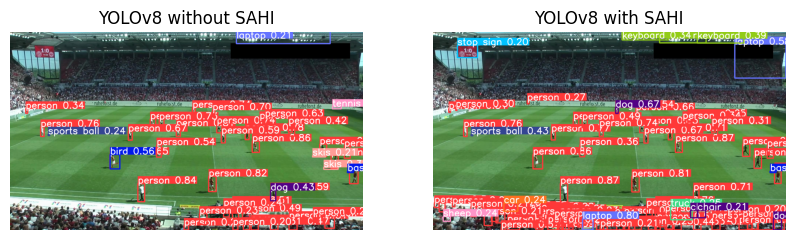

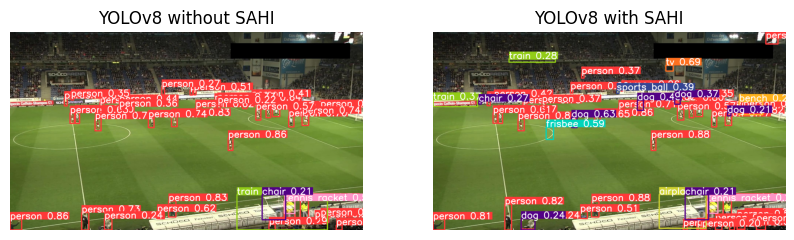

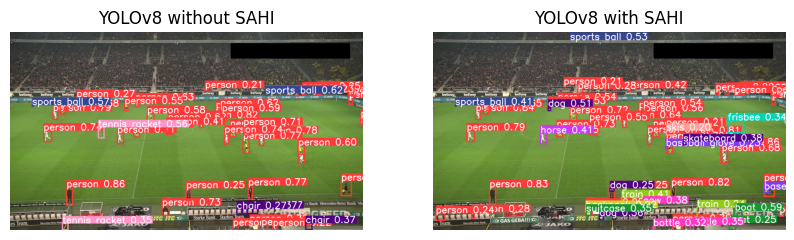

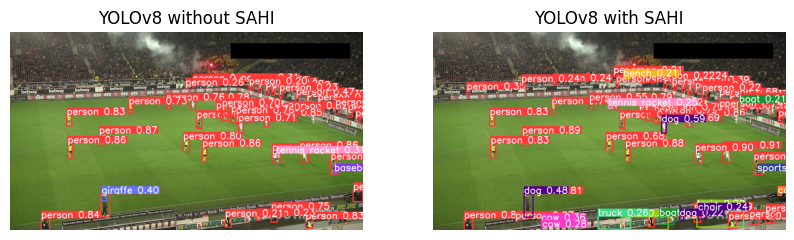

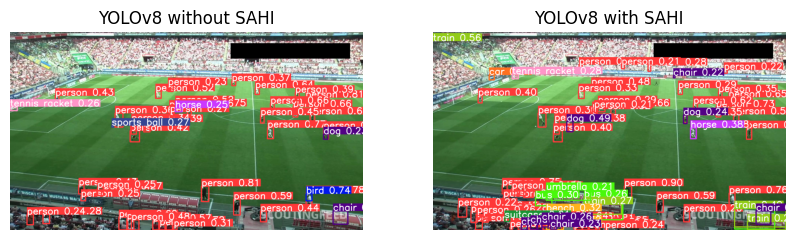

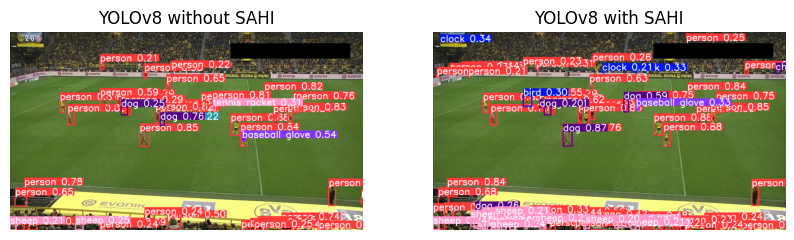

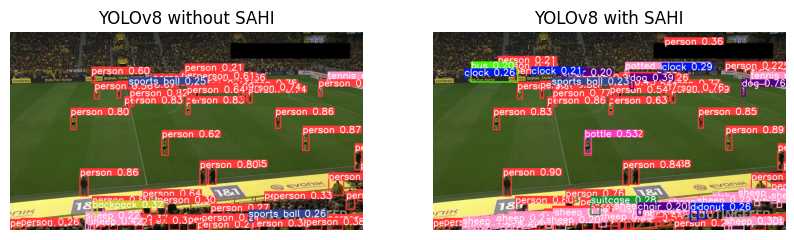

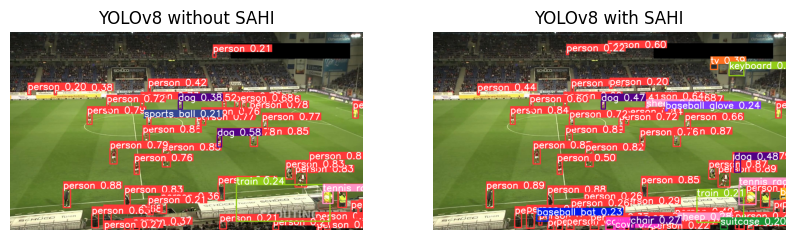

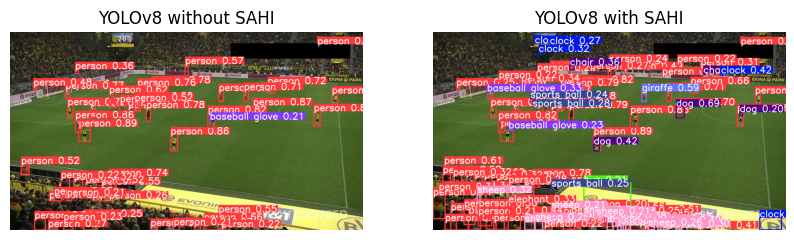

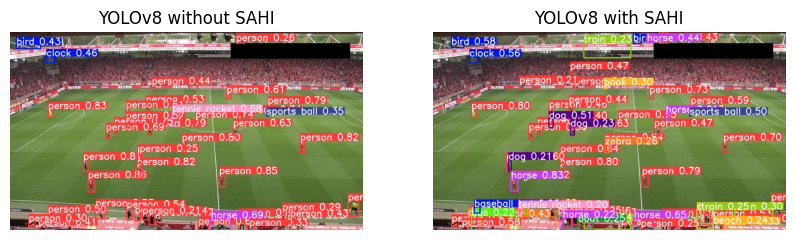

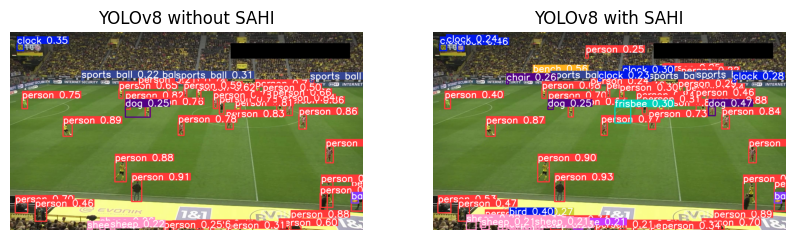

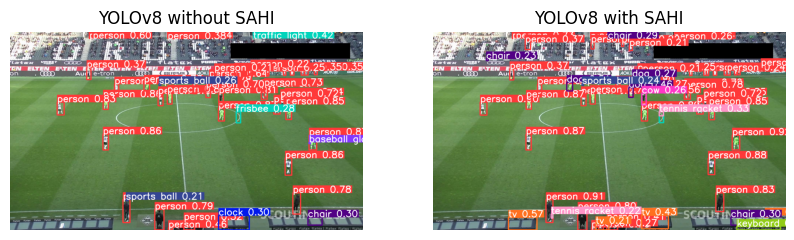

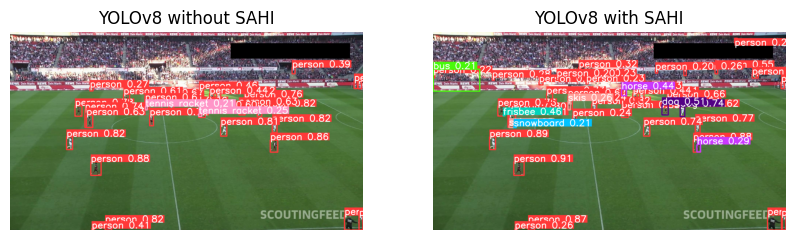

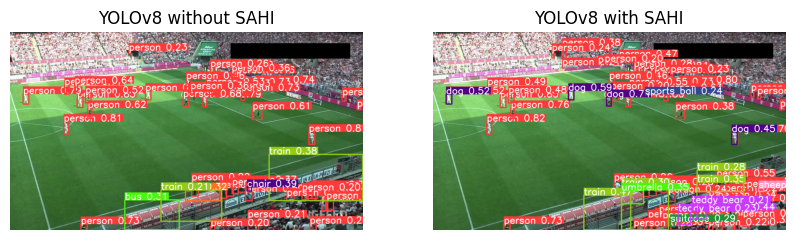

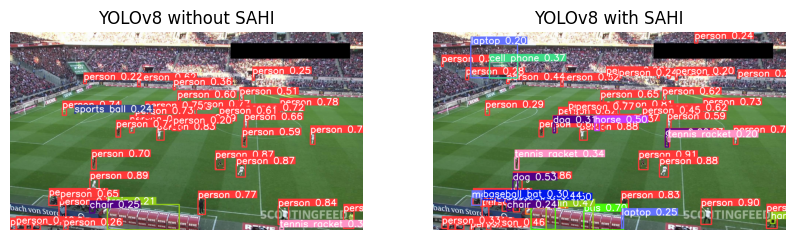

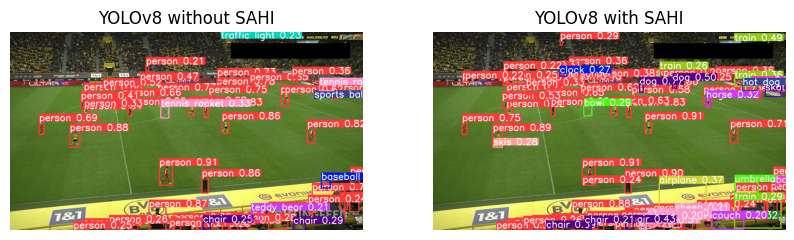

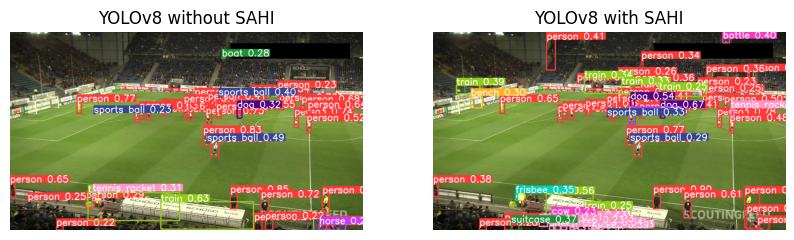

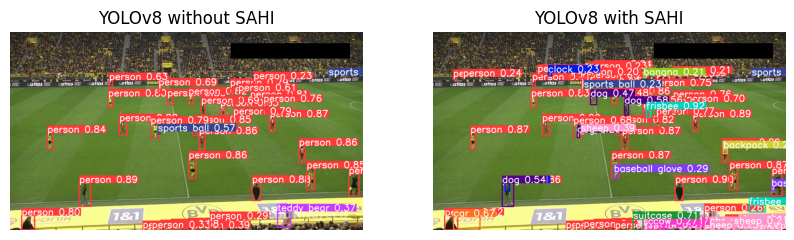

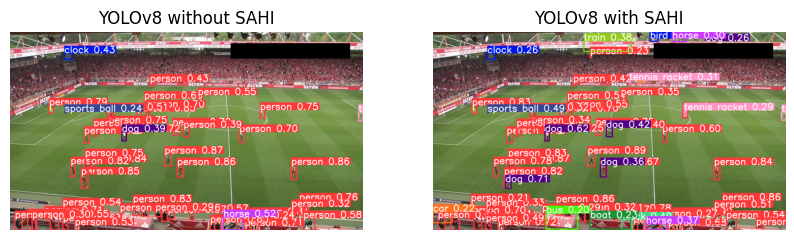

In [16]:
# Define the paths to the two folders
folder1 = '/content/runs/predict/exp/visuals'
folder2 = '/content/runs/predict/exp2/visuals'

# Get a list of image files from each folder
files1 = [f for f in os.listdir(folder1) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
files2 = [f for f in os.listdir(folder2) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Get the maximum number of images to show (the length of the longer list)
max_images = max(len(files1), len(files2))

# Iterate over both lists and display images side by side
for i in range(max_images):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with 1 row and 2 columns

    # Display image from the first folder, if available
    if i < len(files1):
        img1 = mpimg.imread(os.path.join(folder1, files1[i]))
        axs[0].imshow(img1)
        axs[0].axis('off')
        axs[0].set_title('YOLOv8 without SAHI')
    else:
        axs[0].axis('off')  # Turn off the subplot if no image is available

    # Display image from the second folder, if available
    if i < len(files2):
        img2 = mpimg.imread(os.path.join(folder2, files2[i]))
        axs[1].imshow(img2)
        axs[1].axis('off')
        axs[1].set_title('YOLOv8 with SAHI')
    else:
        axs[1].axis('off')  # Turn off the subplot if no image is available

    plt.show()


# References

1. Marks, J. (2024). *How to Detect Small Objects*. Voxel51. [Link to Article](https://voxel51.com/blog/how-to-detect-small-objects/)
2. Jocher, G. & Rizwan, M. (2023).  *Ultralytics Docs: Using YOLOv8 with SAHI for Sliced Inference*. Ultralytics YOLO Docs. [Link to Article](https://docs.ultralytics.com/guides/sahi-tiled-inference/)

3. Roboflow. (2024). *Football Players Detection Dataset*. Roboflow Universe. Retrieved from [Link to Article](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc).